In [16]:
import numpy as np 
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import networkx as nx

[nltk_data] Downloading package punkt to /home/darkness/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/darkness/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pre Processing

### Text Retrival

In [2]:
f = open("Text.txt")
data = f.readlines()[10:]
data = data[:-13]
f.close()

In [3]:
data

['The tech industry is extremely dynamic and the only constant is change. Companies that once appeared to be invulnerable can be regularly upset by upstarts unless they adapt. We can see this in the difference in fortunes between Microsoft and Intel which both saw the PC displaced by mobile devices. Microsoft adapted by pivoting to the cloud while Intel’s fortunes have declined as ARM, TSMC and Nvidia are ascendant..\n',
 'Google is facing similar potential disruption in its core search business due to the rise of answer engines like Perplexity, ChatGPT and Microsoft’s Copilot. The media narrative has turned against Google, especially towards its CEO Sundar Pichai, with articles with titles like Alphabet Needs Its Own Mark Zuckerberg and Alphabet Faces ‘Clear and Present Danger’ of Falling Short in AI being published almost daily.\n',
 'However this negativity seems somewhat extreme in comparison to the facts. ChatGPT’s growth on the web has flatlined since peaking in May of 2023 while

### Tokenization

In [4]:
# Sentence Splitting
sentences = []
for i in data:
    sentences += nltk.sent_tokenize(i)
for i in sentences:
    print(i)

print(len(sentences))
# Word Splitting
words_in_sentence = []
for i in sentences:
    words_in_sentence.append(nltk.word_tokenize(i))
# print(words_in_sentence)

The tech industry is extremely dynamic and the only constant is change.
Companies that once appeared to be invulnerable can be regularly upset by upstarts unless they adapt.
We can see this in the difference in fortunes between Microsoft and Intel which both saw the PC displaced by mobile devices.
Microsoft adapted by pivoting to the cloud while Intel’s fortunes have declined as ARM, TSMC and Nvidia are ascendant..
Google is facing similar potential disruption in its core search business due to the rise of answer engines like Perplexity, ChatGPT and Microsoft’s Copilot.
The media narrative has turned against Google, especially towards its CEO Sundar Pichai, with articles with titles like Alphabet Needs Its Own Mark Zuckerberg and Alphabet Faces ‘Clear and Present Danger’ of Falling Short in AI being published almost daily.
However this negativity seems somewhat extreme in comparison to the facts.
ChatGPT’s growth on the web has flatlined since peaking in May of 2023 while Alphabet repo

In [5]:
Stop_word = stopwords.words('english')


words_nostop_in_sentence = []
for i in words_in_sentence:
    temp = [word for word in i if word not in Stop_word and word.isalnum()==True]
    words_nostop_in_sentence.append(temp)

### POS Tagging

In [6]:
POS = []
for i in words_nostop_in_sentence:
    POS.append(nltk.pos_tag(i))

### Lemmatization

In [7]:
root_per_sentence = []
obj = nltk.WordNetLemmatizer()

for i in words_nostop_in_sentence:
    temp  = [obj.lemmatize(j) for j in i ] 
    root_per_sentence.append(temp)

### Representation

In [8]:
def mag(vct):
    return np.sum(vct**2)

In [9]:
def ft_vector_similarity(v1,v2):
    return (np.dot(v1,v2.T) / ((mag(v1) * mag(v2))))[0][0]

In [10]:
from gensim.models import FastText
fmodel = FastText(sentences=root_per_sentence,min_count=1,vector_size=150,window=5,workers=5,epochs=100)
ft_vectors = [fmodel.wv[root_per_sentence[i]].sum(axis = 0).reshape(1,150) for i in range(len(root_per_sentence))]

In [11]:
MAT1 = np.array([[ft_vector_similarity(ft_vectors[j],ft_vectors[i]) if i!=j else 0 for i in range(len(ft_vectors))] for j in range(len(ft_vectors))])

In [12]:
def text_similarity(root_s1,root_s2,s1,s2):
    common_words = []
    
    for word in root_s1:
        if word in root_s2:
            common_words.append(word)
    similarity_score = len(common_words)/(np.log(len(s1)) + (np.log(len(s2))))
    return similarity_score

In [13]:
MAT2 = np.array([[text_similarity(root_per_sentence[i],root_per_sentence[j],words_in_sentence[i],words_in_sentence[j]) if i!=j else 0 for i in range(len(sentences))] for j in range(len(sentences))])

In [14]:
G = MAT1 + MAT2

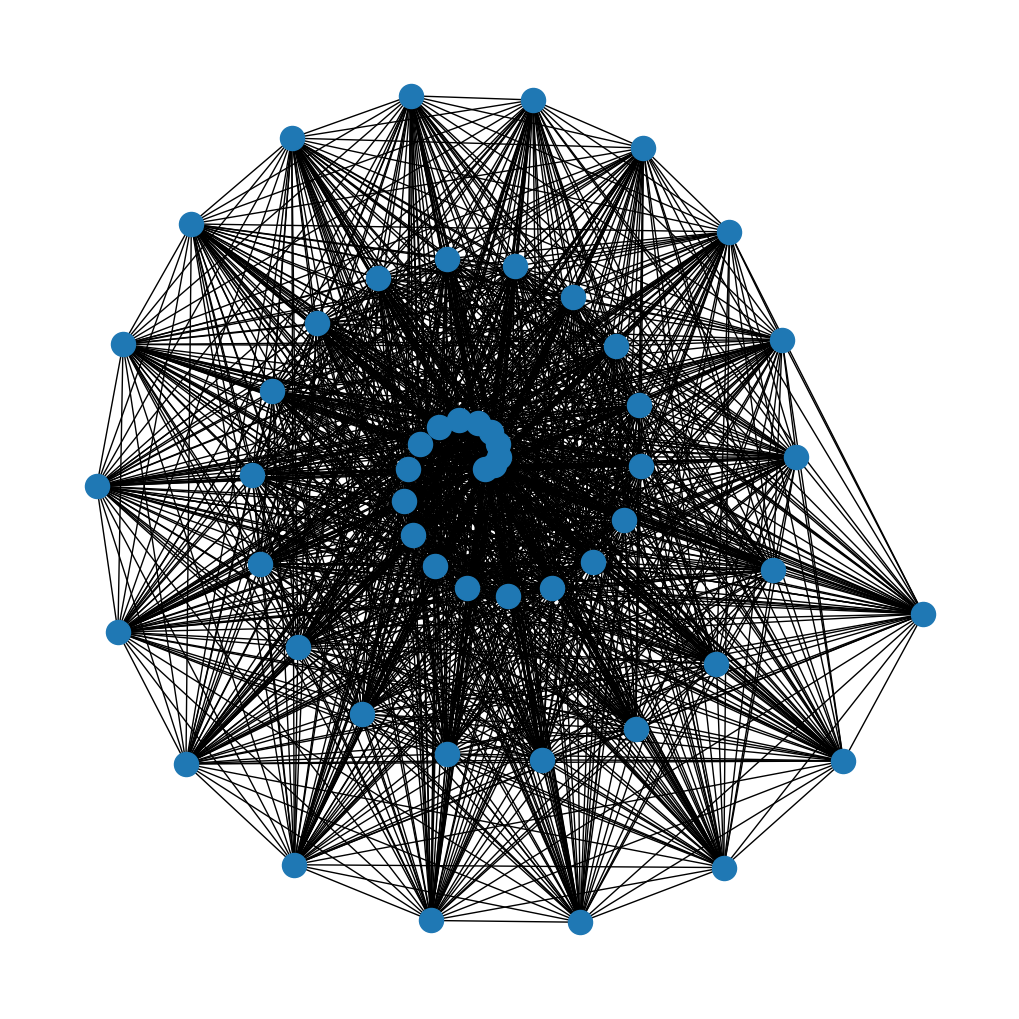

In [19]:
Graph = nx.from_numpy_array(G,create_using=nx.MultiGraph())
plt.figure(figsize=(10,10))
pos = nx.spiral_layout(Graph)
nx.draw(Graph,pos)
plt.show()

In [22]:
pg = sorted(nx.pagerank(Graph).items(),key= lambda x : x[1],reverse=True)
sent = [i[0] for i in sorted(pg[:15])]

In [23]:
for i in sent:
    print(sentences[i])

Google is facing similar potential disruption in its core search business due to the rise of answer engines like Perplexity, ChatGPT and Microsoft’s Copilot.
So which is it?
Websites create content that makes Google useful, free of cost to Google, and in exchange get valuable traffic from people who click on links in search results.
The more people there were using Google, the harder it was for other search engines to compete since Google had more data to train the relevance of its engine than anyone else.
Google then put its thumb on the scale by paying out over $26 billion a year in payments to ensure it captured the most valuable search entry points, thus preventing any upstart from doing to them what it did to search engines like Alta Vista and Excite decades ago.
For decades it’s been structurally impossible for an upstart search engine to compete with Google due to these dynamics as Microsoft literally testified in court.
The same way digital cameras made Kodak’s advantages in fi

## END